In [17]:
# Utilice este espacio para escribir el código.
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [18]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:
#evaluaciones = pd.read_csv('Evaluaciones_Agropecuarias_Municipales_EVA.csv')
evaluaciones = pd.read_csv('/content/drive/MyDrive/PROYECTO_ANS/Evaluaciones_Agropecuarias_Municipales_EVA.csv')

nuevos_nombres = {
    'CÓD. \nDEP.': 'CODIGO_DEPARTAMENTO',
    'DEPARTAMENTO': 'NOMBRE_DEPARTAMENTO',
    'CÓD. MUN.': 'CODIGO_MUNICIPIO',
    'MUNICIPIO': 'NOMBRE_MUNICIPIO',
    'GRUPO \nDE CULTIVO': 'GRUPO_CULTIVO',
    'SUBGRUPO \nDE CULTIVO': 'SUBGRUPO_CULTIVO',
    'CULTIVO': 'NOMBRE_CULTIVO',
    'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO': 'REGION_SISTEMA',
    'AÑO': 'ANIO',
    'PERIODO': 'PERIODO',
    'Área Sembrada\n(ha)': 'AREA_SIEMBRA_HA',
    'Área Cosechada\n(ha)': 'AREA_COSECHA_HA',
    'Producción\n(t)': 'PRODUCCION_TONELADAS',
    'Rendimiento\n(t/ha)': 'RENDIMIENTO_TONELADAS_HA',
    'ESTADO FISICO PRODUCCION': 'ESTADO_PRODUCCION',
    'NOMBRE \nCIENTIFICO': 'NOMBRE_CIENTIFICO',
    'CICLO DE CULTIVO': 'CICLO_CULTIVO'}
evaluaciones.rename(columns=nuevos_nombres, inplace=True)

In [20]:
evaluaciones

,CODIGO_DEPARTAMENTO,NOMBRE_DEPARTAMENTO,CODIGO_MUNICIPIO,NOMBRE_MUNICIPIO,GRUPO_CULTIVO,SUBGRUPO_CULTIVO,NOMBRE_CULTIVO,REGION_SISTEMA,ANIO,PERIODO,AREA_SIEMBRA_HA,AREA_COSECHA_HA,PRODUCCION_TONELADAS,RENDIMIENTO_TONELADAS_HA,ESTADO_PRODUCCION,NOMBRE_CIENTIFICO,CICLO_CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO


In [21]:
evaluaciones.nunique()

CODIGO_DEPARTAMENTO            32
NOMBRE_DEPARTAMENTO            32
CODIGO_MUNICIPIO             1105
NOMBRE_MUNICIPIO             1018
GRUPO_CULTIVO                  13
SUBGRUPO_CULTIVO              120
NOMBRE_CULTIVO                223
REGION_SISTEMA                271
ANIO                           13
PERIODO                        36
AREA_SIEMBRA_HA              5023
AREA_COSECHA_HA              4557
PRODUCCION_TONELADAS        10230
RENDIMIENTO_TONELADAS_HA     3621
ESTADO_PRODUCCION              23
NOMBRE_CIENTIFICO             214
CICLO_CULTIVO                   3
dtype: int64

In [22]:
evaluaciones2=evaluaciones[['CODIGO_MUNICIPIO', 'NOMBRE_CULTIVO']]

In [23]:
pivot = np.round(pd.pivot_table(evaluaciones2, index='CODIGO_MUNICIPIO',
                                columns='NOMBRE_CULTIVO', aggfunc= len, fill_value=0))

In [24]:
pivot.reset_index(inplace=True)

In [25]:
pivot

NOMBRE_CULTIVO,CODIGO_MUNICIPIO,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,AHUYAMA,AJI,...,ULLUCO,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME
0,5001,0,0,0,0,0,12,0,0,0,...,0,0,0,0,0,0,12,24,0,0
1,5002,0,0,0,0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5004,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5021,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,10,0,0,0
4,5030,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,97666,0,0,0,0,0,0,0,0,1,...,0,2,0,1,0,0,10,0,0,2
1101,99001,0,0,0,0,0,0,0,11,0,...,0,0,0,0,0,0,12,0,0,0
1102,99524,0,0,0,0,0,5,0,7,0,...,0,0,0,0,0,0,15,0,0,0
1103,99624,0,0,0,0,0,0,0,16,0,...,0,0,0,0,0,0,12,0,0,0


In [26]:
pivot['DPTOMPIO']=pivot['CODIGO_MUNICIPIO']

In [27]:
#municipios=gpd.read_file("MunicipiosVeredas19MB.json")
municipios=gpd.read_file('/content/drive/MyDrive/PROYECTO_ANS/MunicipiosVeredas19MB.json')

In [28]:
municipios.nunique()

DPTOMPIO      1121
DPTO_CCDGO      33
MPIO_CCDGO     580
MPIO_CNMBR    1036
MPIO_CCNCT    1121
geometry      1121
dtype: int64

In [29]:
municipios['DPTOMPIO']=municipios[['DPTOMPIO']].apply(pd.to_numeric)

In [30]:
municipios

,DPTOMPIO,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CCNCT,geometry
0,5001,05,001,MEDELLÍN,05001,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351..."
1,5002,05,002,ABEJORRAL,05002,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026..."
2,5004,05,004,ABRIAQUÍ,05004,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877..."
3,5021,05,021,ALEJANDRÍA,05021,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469..."
4,5030,05,030,AMAGÁ,05030,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216..."
...,...,...,...,...,...,...
1116,97889,97,889,YAVARATÉ,97889,"POLYGON ((-69.99653 0.54682, -69.99598 0.54751..."
1117,99001,99,001,PUERTO CARREÑO,99001,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6..."
1118,99524,99,524,LA PRIMAVERA,99524,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472..."
1119,99624,99,624,SANTA ROSALÍA,99624,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669..."


In [31]:
municipios2=municipios[['DPTOMPIO','geometry']]

In [32]:
municipios2

,DPTOMPIO,geometry
0,5001,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351..."
1,5002,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026..."
2,5004,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877..."
3,5021,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469..."
4,5030,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216..."
...,...,...
1116,97889,"POLYGON ((-69.99653 0.54682, -69.99598 0.54751..."
1117,99001,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6..."
1118,99524,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472..."
1119,99624,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669..."


In [33]:
pivot = pivot.astype({'CODIGO_MUNICIPIO':'int'})
municipios3=pd.merge(municipios2,pivot, left_on='DPTOMPIO', right_on='DPTOMPIO')


In [34]:
municipios3

,DPTOMPIO,geometry,CODIGO_MUNICIPIO,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,...,ULLUCO,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME
0,5001,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351...",5001,0,0,0,0,0,12,0,...,0,0,0,0,0,0,12,24,0,0
1,5002,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026...",5002,0,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
2,5004,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877...",5004,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
3,5021,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469...",5021,0,0,0,0,0,4,0,...,0,0,0,0,0,0,10,0,0,0
4,5030,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216...",5030,0,0,0,0,0,10,0,...,0,0,0,0,0,0,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,97666,"POLYGON ((-69.42882 -1.07654, -69.42842 -1.074...",97666,0,0,0,0,0,0,0,...,0,2,0,1,0,0,10,0,0,2
1100,99001,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6...",99001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0
1101,99524,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472...",99524,0,0,0,0,0,5,0,...,0,0,0,0,0,0,15,0,0,0
1102,99624,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669...",99624,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0


In [35]:
municipios3 = municipios3.iloc[: , 1:]
municipios3

,geometry,CODIGO_MUNICIPIO,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,AHUYAMA,...,ULLUCO,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME
0,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351...",5001,0,0,0,0,0,12,0,0,...,0,0,0,0,0,0,12,24,0,0
1,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026...",5002,0,0,0,0,0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877...",5004,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469...",5021,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,10,0,0,0
4,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216...",5030,0,0,0,0,0,10,0,0,...,0,0,0,0,0,0,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,"POLYGON ((-69.42882 -1.07654, -69.42842 -1.074...",97666,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,10,0,0,2
1100,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6...",99001,0,0,0,0,0,0,0,11,...,0,0,0,0,0,0,12,0,0,0
1101,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472...",99524,0,0,0,0,0,5,0,7,...,0,0,0,0,0,0,15,0,0,0
1102,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669...",99624,0,0,0,0,0,0,0,16,...,0,0,0,0,0,0,12,0,0,0


In [36]:
from sklearn import metrics
metrics.pairwise_distances(
    municipios3.loc[:, ~municipios3.columns.isin(['geometry', 'CODIGO_MUNICIPIO'])].head()
).round(4)

array([[  0.    , 103.0776, 106.4049, 101.7349, 106.3297],
       [103.0776,   0.    ,  33.7787,  40.5586,  49.2646],
       [106.4049,  33.7787,   0.    ,  27.1293,  43.6119],
       [101.7349,  40.5586,  27.1293,   0.    ,  44.1814],
       [106.3297,  49.2646,  43.6119,  44.1814,   0.    ]])

In [37]:
from sklearn.preprocessing import robust_scale
db_scaled = robust_scale(municipios3.loc[:, ~municipios3.columns.isin(['geometry', 'CODIGO_MUNICIPIO'])])
db_scaled

array([[ 0.,  0.,  0., ..., 24.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [38]:
# Initialize KMeans instance
from sklearn.cluster import KMeans

In [39]:
kmeans = KMeans(n_clusters=13)

In [40]:
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k13cls = kmeans.fit(db_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
k13cls.labels_[:5]


array([6, 2, 2, 2, 2], dtype=int32)

In [42]:
municipios3["k13cls"] = k13cls.labels_


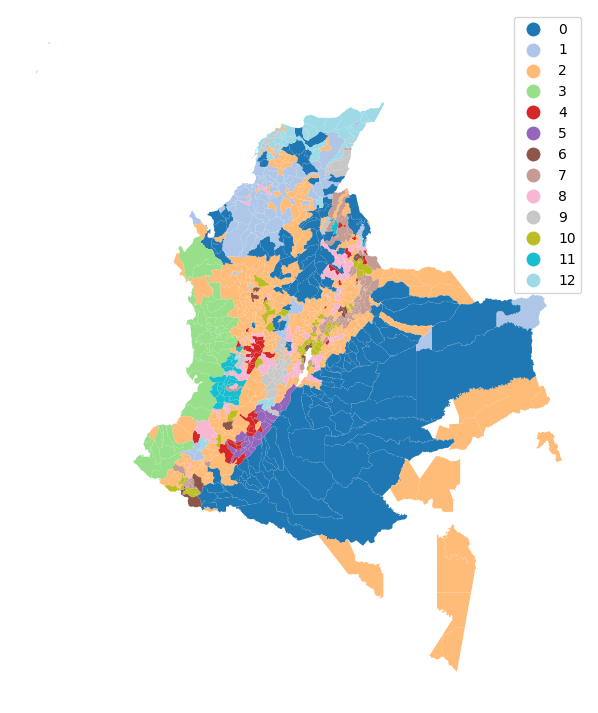

In [43]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
municipios3.plot(
    column="k13cls", categorical=True, legend=True, cmap='tab20',linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [44]:
pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395103 sha256=c62e51f4cb3e99e564d0dcc2d244bd9f154fbbb79acb678adc2cb347ed948978
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [45]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES


# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(db_scaled, amount_initial_centers).initialize()

# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(db_scaled, initial_centers, 20)
xmeans_instance.process()

# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())




Total WCE: 542795.6212553718


In [46]:
len(clusters)

14

In [47]:
clusters = pd.DataFrame(clusters)

In [48]:
clusters

,0,1,2,3,4,5,6,7,8,9,...,436,437,438,439,440,441,442,443,444,445
0,400,602,604,606,608,609,610,611,612,613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,3,4,7,8,9,10,11,12,...,1084.0,1085.0,1087.0,1088.0,1089.0,1090.0,1091.0,1092.0,1098.0,1099.0
2,32,101,105,197,201,203,205,237,253,271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,76,231,233,234,240,246,297,299,302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,13,24,31,44,67,73,74,79,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,35,71,123,150,151,155,169,172,173,181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,119,572,574,575,576,577,578,579,580,582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,377,716,727,742,747,751,753,760,767,772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,34,93,96,112,145,154,157,158,159,166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,41,113,148,153,161,162,163,168,187,266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#cluster_idx=pd.read_csv("cluster_idx.csv")
cluster_idx=pd.read_csv("/content/drive/MyDrive/PROYECTO_ANS/cluster_idx.csv")


In [51]:
cluster_idx

,idx,Cluster
0,41,0
1,113,0
2,153,0
3,161,0
4,162,0
...,...,...
1099,1035,14
1100,1037,14
1101,1038,14
1102,1039,14


In [52]:
municipios3

,geometry,CODIGO_MUNICIPIO,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,AHUYAMA,...,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME,k13cls
0,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351...",5001,0,0,0,0,0,12,0,0,...,0,0,0,0,0,12,24,0,0,6
1,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026...",5002,0,0,0,0,0,12,0,0,...,0,0,0,0,0,0,0,0,0,2
2,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877...",5004,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,2
3,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469...",5021,0,0,0,0,0,4,0,0,...,0,0,0,0,0,10,0,0,0,2
4,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216...",5030,0,0,0,0,0,10,0,0,...,0,0,0,0,0,12,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,"POLYGON ((-69.42882 -1.07654, -69.42842 -1.074...",97666,0,0,0,0,0,0,0,0,...,2,0,1,0,0,10,0,0,2,2
1100,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6...",99001,0,0,0,0,0,0,0,11,...,0,0,0,0,0,12,0,0,0,1
1101,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472...",99524,0,0,0,0,0,5,0,7,...,0,0,0,0,0,15,0,0,0,0
1102,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669...",99624,0,0,0,0,0,0,0,16,...,0,0,0,0,0,12,0,0,0,1


In [53]:

municipios5=municipios3
municipios5.reset_index(inplace=True)

In [54]:
municipios5

,index,geometry,CODIGO_MUNICIPIO,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,...,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME,k13cls
0,0,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351...",5001,0,0,0,0,0,12,0,...,0,0,0,0,0,12,24,0,0,6
1,1,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026...",5002,0,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,2
2,2,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877...",5004,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,2
3,3,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469...",5021,0,0,0,0,0,4,0,...,0,0,0,0,0,10,0,0,0,2
4,4,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216...",5030,0,0,0,0,0,10,0,...,0,0,0,0,0,12,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1099,"POLYGON ((-69.42882 -1.07654, -69.42842 -1.074...",97666,0,0,0,0,0,0,0,...,2,0,1,0,0,10,0,0,2,2
1100,1100,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6...",99001,0,0,0,0,0,0,0,...,0,0,0,0,0,12,0,0,0,1
1101,1101,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472...",99524,0,0,0,0,0,5,0,...,0,0,0,0,0,15,0,0,0,0
1102,1102,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669...",99624,0,0,0,0,0,0,0,...,0,0,0,0,0,12,0,0,0,1


In [55]:
municipios5=pd.merge(municipios5,cluster_idx, left_on='index', right_on='idx')

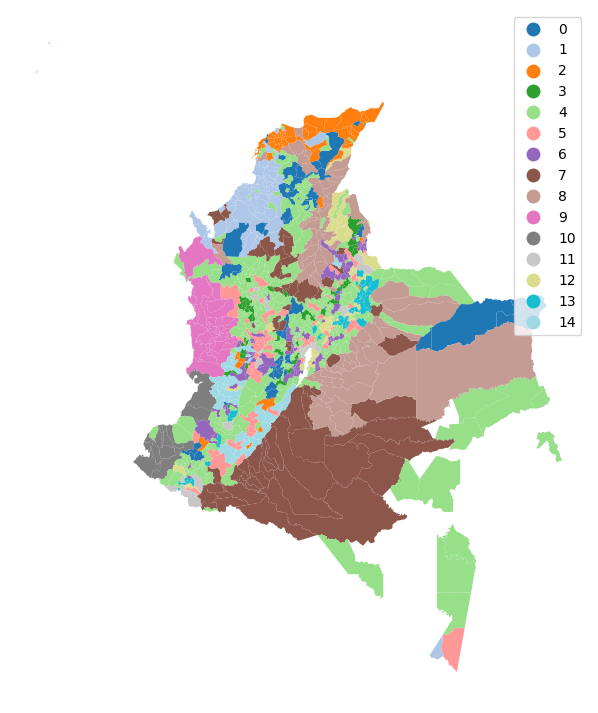

In [56]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
municipios5.plot(
    column="Cluster", categorical=True, legend=True, cmap='tab20',linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#clusters.to_csv('/content/drive/My Drive/clusters.csv', index=False)
clusters.to_csv('/content/drive/MyDrive/PROYECTO_ANS/clusters.csv', index=False)

In [59]:
municipios4=pd.merge(municipios2,pivot, left_on='DPTOMPIO', right_on='DPTOMPIO')

In [60]:
db_scaled

array([[ 0.,  0.,  0., ..., 24.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

##Calculando el número de componentes con PCA

In [61]:
base=municipios3.loc[:, ~municipios3.columns.isin(['geometry', 'CODIGO_MUNICIPIO','k13cls'])]

In [62]:
mu = base.mean()
sigma = base.std()
Z = (base - mu)/sigma
Z

,index,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,AHUYAMA,AJI,...,ULLUCO,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME
0,-1.729699,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,1.623728,-0.042582,-0.444966,-0.339406,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,0.669150,4.517517,-0.164975,-0.337564
1,-1.726562,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,1.623728,-0.042582,-0.444966,-0.339406,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,-1.681036,-0.302720,-0.164975,-0.337564
2,-1.723426,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,0.595628,-0.042582,-0.444966,-0.339406,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,-1.681036,-0.302720,-0.164975,-0.337564
3,-1.720290,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,-0.021233,-0.042582,-0.444966,-0.339406,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,0.277453,-0.302720,-0.164975,-0.337564
4,-1.717153,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,1.212488,-0.042582,-0.444966,-0.339406,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,0.669150,-0.302720,-0.164975,-0.337564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1.717153,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,-0.843713,-0.042582,-0.444966,-0.094821,...,-0.107382,29.689071,-0.219181,2.489410,-0.030096,-0.102873,0.277453,-0.302720,-0.164975,0.169126
1100,1.720290,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,-0.843713,-0.042582,1.507227,-0.339406,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,0.669150,-0.302720,-0.164975,-0.337564
1101,1.723426,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,0.184388,-0.042582,0.797338,-0.339406,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,1.256697,-0.302720,-0.164975,-0.337564
1102,1.726562,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,-0.843713,-0.042582,2.394587,-0.339406,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,0.669150,-0.302720,-0.164975,-0.337564


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


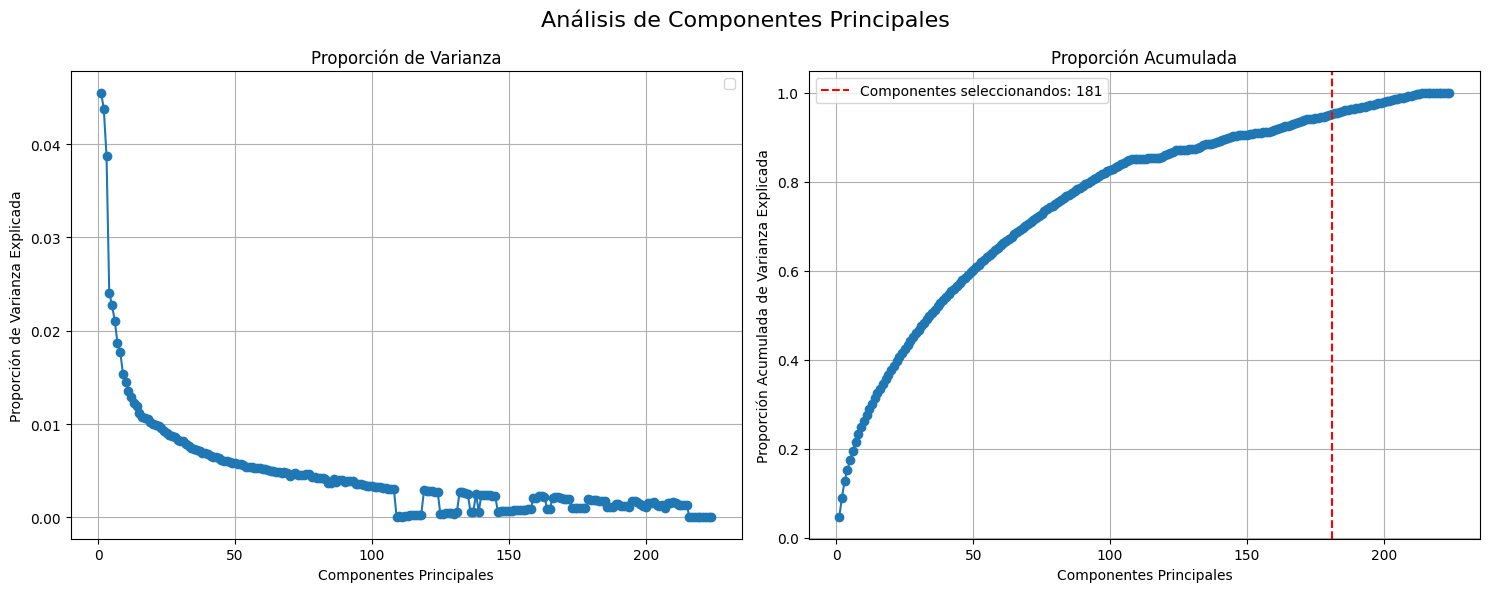

In [63]:
S = Z.cov()
eig_val, eig_vec = np.linalg.eig(S)
eig_val_diag = np.diag(eig_val)
proporcion_varianza_CP = eig_val/sum(eig_val)
# Establece el umbral deseado (por ejemplo, 0.95 para capturar al menos el 95% de la varianza)
umbral = 0.95



# Número de componentes principales mediante examen visual de un gráfico de sedimentación (scree plot).
num_componentes = len(proporcion_varianza_CP)

# Gráfico de scree plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_componentes + 1), proporcion_varianza_CP, marker='o')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Proporción de Varianza')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
varianza_acumulada = np.cumsum(proporcion_varianza_CP)
# Encuentra el número de componentes principales que cumplen el umbral
num_componentes_seleccionados = np.argmax(varianza_acumulada >= umbral) + 1
plt.plot(range(1, num_componentes + 1), varianza_acumulada, marker='o')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.title('Proporción Acumulada')
plt.grid(True)
plt.axvline(x=num_componentes_seleccionados, color='r', linestyle='--', label=f'Componentes seleccionandos: {num_componentes_seleccionados}')
plt.legend()

plt.suptitle('Análisis de Componentes Principales', fontsize=16)
plt.tight_layout()
plt.show()

In [64]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components = 179).fit_transform(Z)

In [65]:
k13clsPCA = kmeans.fit(reduced_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
municipios3["k13clsPCA"] = k13clsPCA.labels_

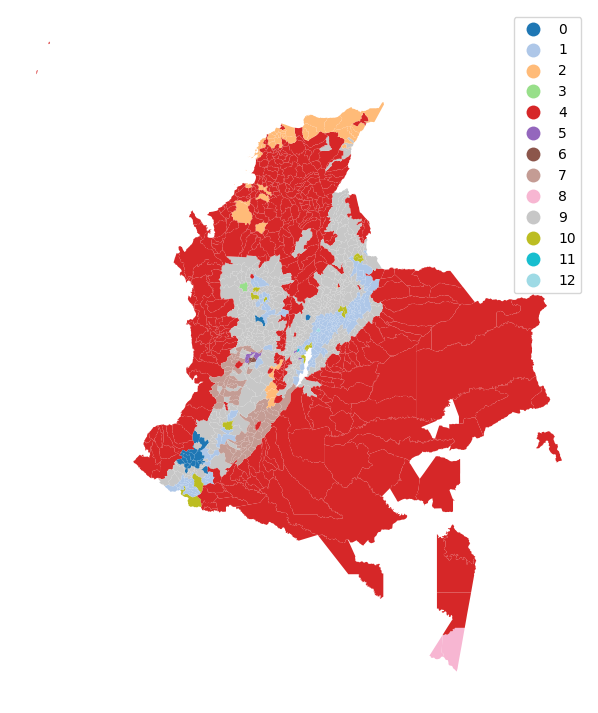

In [67]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
municipios3.plot(
    column="k13clsPCA", categorical=True, legend=True, cmap='tab20',linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [68]:
# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 5
initial_centers = kmeans_plusplus_initializer(reduced_data, amount_initial_centers).initialize()

# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(reduced_data, initial_centers, 20)
xmeans_instance.process()

# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())

Total WCE: 220604.39106297764


In [69]:
len(clusters)

6

In [70]:
from sklearn.metrics import silhouette_score
K=30
Y={}
varianza_intra_cluster = []
silhouettes = []
for k in range (1, K+1): # Evaluamos entre 1 a 40 clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(reduced_data)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(reduced_data, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_

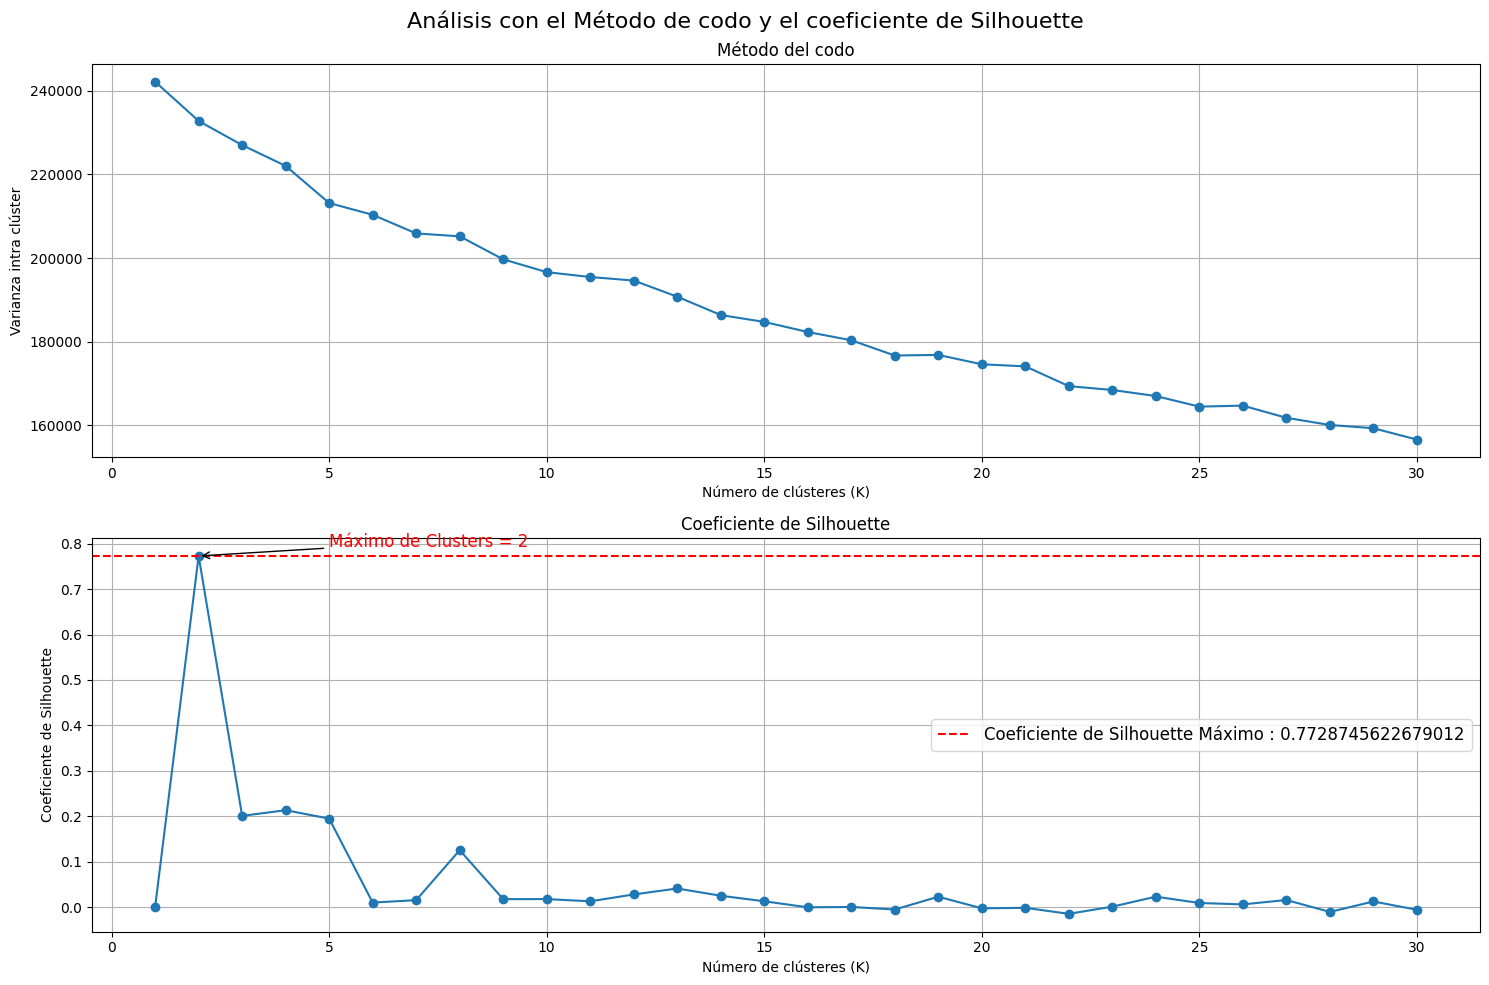

In [71]:
# Crear la figura y los subplots

# Gráfico de scree plot

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(range(1, 31), varianza_intra_cluster, marker='o')
plt.title("Método del codo")
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')

plt.grid()


plt.subplot(2, 1, 2)
plt.plot(range(1, 31), silhouettes, marker='o')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Coeficiente de Silhouette')
plt.axhline(y=max(silhouettes), color='r', linestyle='--', label=f'Coeficiente de Silhouette Máximo : {max(silhouettes)}')# Encontrar el índice del máximo valor en silhouettes
plt.legend(fontsize=12)

max_silhouette_index = np.argmax(silhouettes) + 1  # Sumamos 1 para convertir el índice en K
max_silhouette_value = max(silhouettes)

plt.annotate(f'Máximo de Clusters = {max_silhouette_index}', xy=(max_silhouette_index, max_silhouette_value), xytext=(max_silhouette_index + 3, max_silhouette_value + 0.02),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12,color='r')  # Ajusta el tamaño de fuente aquí

plt.grid()

plt.suptitle('Análisis con el Método de codo y el coeficiente de Silhouette', fontsize=16)
plt.tight_layout()  # Añadido para mejorar la disposición de los subplots
plt.show()

In [72]:
kmeans10 = KMeans(n_clusters=10)
k10cls = kmeans10.fit(reduced_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
municipios3["k10cls"] = k10cls.labels_

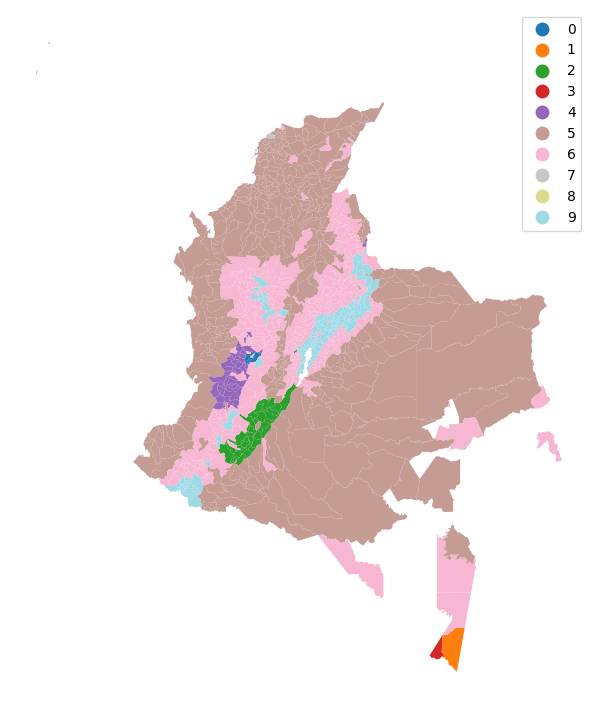

In [74]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
municipios3.plot(
    column="k10cls", categorical=True, legend=True, cmap='tab20',linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [75]:
kmeans6 = KMeans(n_clusters=6)
k6cls = kmeans6.fit(reduced_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


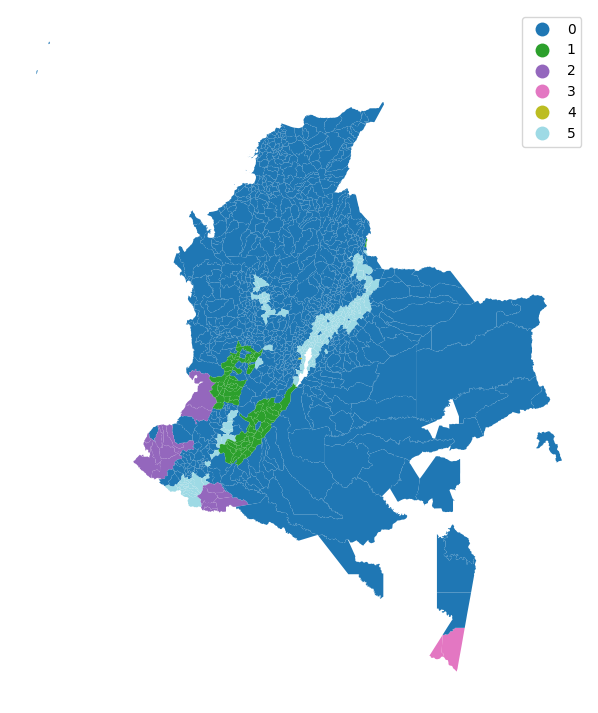

In [76]:
municipios3["k6cls"] = k6cls.labels_
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
municipios3.plot(
    column="k6cls", categorical=True, legend=True, cmap='tab20',linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [77]:
mejores_rendimientos = evaluaciones[evaluaciones['RENDIMIENTO_TONELADAS_HA'] > 0]
mejores_rendimientos = evaluaciones.groupby(['GRUPO_CULTIVO', 'NOMBRE_DEPARTAMENTO'])['RENDIMIENTO_TONELADAS_HA'].max().reset_index()
mejores_rendimientos

,GRUPO_CULTIVO,NOMBRE_DEPARTAMENTO,RENDIMIENTO_TONELADAS_HA
0,CEREALES,AMAZONAS,3.00
1,CEREALES,ANTIOQUIA,35.00
2,CEREALES,ARAUCA,7.50
3,CEREALES,ATLANTICO,8.16
4,CEREALES,BOLIVAR,7.75
...,...,...,...
312,TUBERCULOS Y PLATANOS,SUCRE,26.00
313,TUBERCULOS Y PLATANOS,TOLIMA,38.00
314,TUBERCULOS Y PLATANOS,VALLE DEL CAUCA,36.00
315,TUBERCULOS Y PLATANOS,VAUPES,30.00


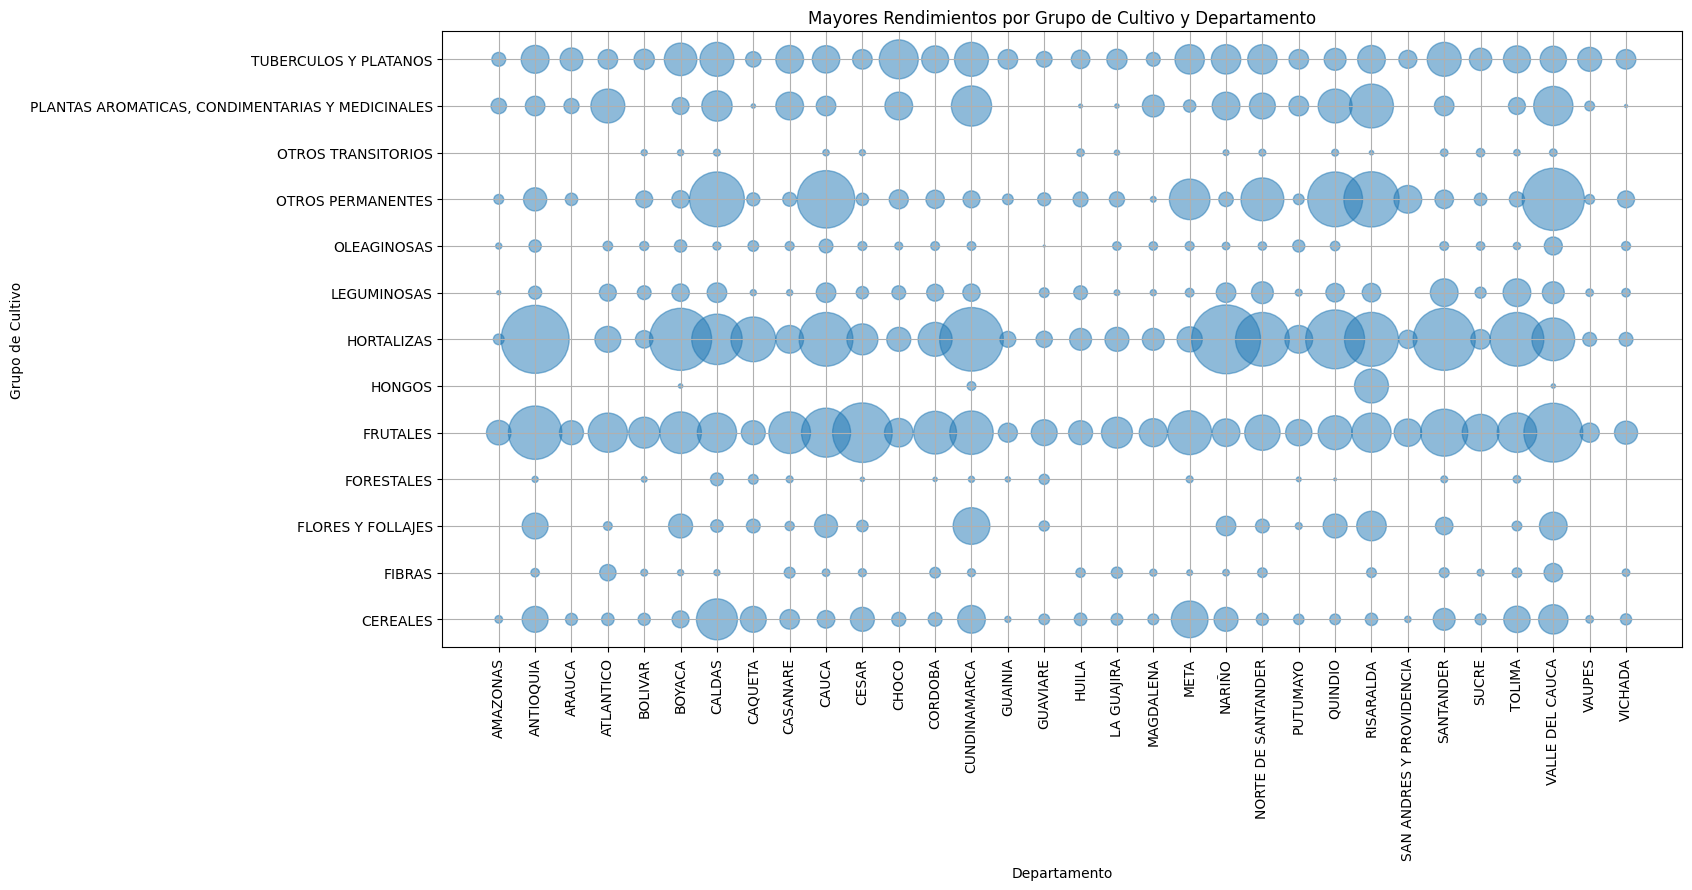

In [78]:
# Crear una gráfica de puntos (scatter plot)
plt.figure(figsize=(16, 8))
plt.scatter(mejores_rendimientos['NOMBRE_DEPARTAMENTO'], mejores_rendimientos['GRUPO_CULTIVO'], s=mejores_rendimientos['RENDIMIENTO_TONELADAS_HA'] * 10, alpha=0.5)
plt.xlabel('Departamento')
plt.ylabel('Grupo de Cultivo')
plt.title('Mayores Rendimientos por Grupo de Cultivo y Departamento')
plt.xticks(rotation=90)  # Para rotar las etiquetas del eje x para una mejor visualización
plt.grid(True)
plt.show()